# Home task : KNN classification

1. iris dataset

    load iris dataset
    
    split to train and test
    
    train KNN classifiers for different K
    
    choose the best K determined on test set
    

2. synthetic dataset

    generrate synthetic dataset
    
    split to train and test
    
    train KNN regressors for different Km
    
    choose the best K determined on test set
    
    visualize the decision boundary
    

## Iris dataset

In [16]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [17]:
iris = load_iris()
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])

In [18]:
df_train, df_validate, df_test = np.split(df_iris.sample(frac=1, random_state=42), 
                                          [int(.6*len(df_iris)), int(.8*len(df_iris))])
X_train = df_train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_train = df_train[['label']]

X_test = df_test [['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_test = df_test[['label']]

X_validate = df_validate[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_validate = df_validate[['label']]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validate_scaled = scaler.transform(X_validate)


In [20]:
diction_test = {}
diction_validate = {}
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_scaled, y_train.values.ravel())
    diction_test[k] = knn.score(X_test_scaled, y_test)
    
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_validate_scaled, y_validate.values.ravel())
    diction_validate[k] = knn.score(X_validate_scaled, y_validate)
print('Test best k - ', max(diction_test, key = diction_test.get), ' Score - ', diction_test[max(diction_test, key = diction_test.get)])# find index of max value in dictionary
print('Validate best k - ', max(diction_validate, key = diction_validate.get), ' Score - ', diction_validate[max(diction_validate, key = diction_validate.get)])# find index of max value in dictionary

Test best k -  7  Score -  0.9666666666666667
Validate best k -  1  Score -  1.0


# Synthetic dataset

<IPython.core.display.Javascript object>


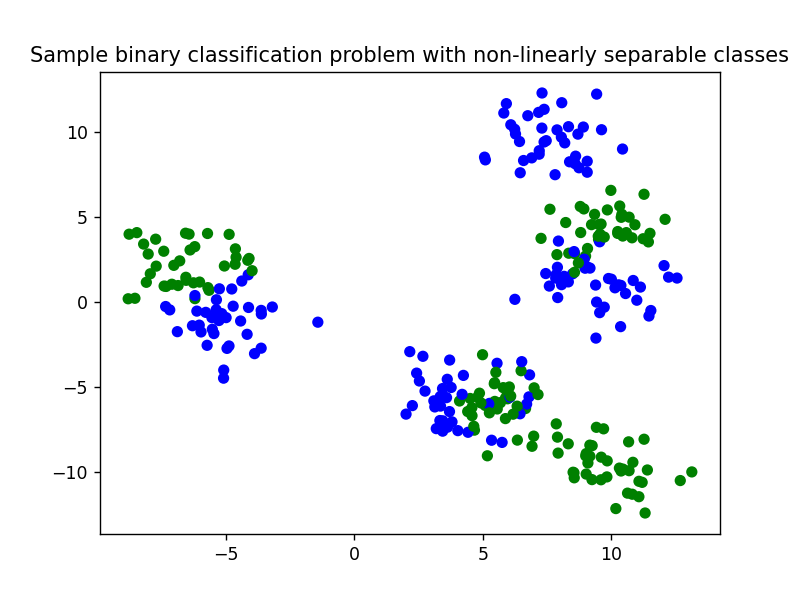

In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier 

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dict_test = {}
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_scaled, y_train)
    diction_test[k] = knn.score(X_test_scaled, y_test)
best_k = max(diction_test, key = diction_test.get)

print('Test best k - ', max(diction_test, key = diction_test.get),' Score - ', diction_test[max(diction_test, key = diction_test.get)])# find index of max value in dictionary

from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X, y)
print('best k value of validation', knn_gscv.best_params_)

Test best k -  2  Score -  0.9333333333333333
best k value of validation {'n_neighbors': 6}


In [23]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50):

    '''
    similar to plot_decision_boundary_original_X  but considers also test samples
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    Note: make sure to provide the same data as provided for fit (e.g. scaled) but without "one" column
    Copied and modified from adspy_shared_utilities.py'''

    # Create color maps
    from matplotlib.colors import  ListedColormap
    import matplotlib as mpl

    colors_for_areas= [mpl.cm.viridis(.45),mpl.cm.viridis(.6)]
    colors_for_points = [mpl.cm.viridis(.3),mpl.cm.viridis(.75)]
    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold  = ListedColormap(colors_for_points)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = precision #.01  # step size in the mesh

    X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Creates grids of values
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))

    # numpy.c_  concatenation along the second axis
    # ravel() Returns a contiguous flattened array.
        # x = np.array([[1, 2, 3], [4, 5, 6]])
        # np.ravel(x) = [1 2 3 4 5 6]
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])# 2-column ndarray # creates the all possible pairs
    # m= target_samples_grid.shape[0]
    # target_samples_grid_1= np.c_[np.ones(shape=(m,1)),target_samples_grid]
    print ('Call prediction for all grid values (precision of drawing = {}, you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, c=y_train.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, c=y_test.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    import matplotlib.patches as mpatches
    patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
    patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
    plt.legend(handles=[patch0, patch1])
    plt.title(title)

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')

    plt.show()

# Visualization

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


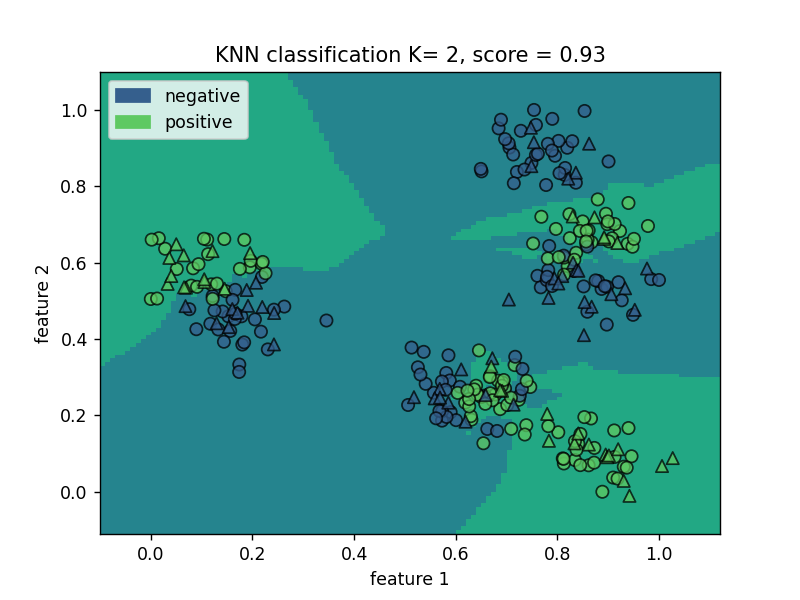

<ipython-input-23-631dcbc60ac2>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)


In [24]:
clf = KNeighborsClassifier(n_neighbors = best_k)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)
plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(best_k, score), 
                               precision=0.01,plot_symbol_size = 50)